In [122]:
"""
This is the backend of Linear regression model that is constructed using Gradient Descent Algorithm
"""

import sys
import numpy as np
class LinearRegression_model():
    def __init__(self):
        self.slope=None
        self.y_intercept=None
        self.learning_rate=0.1

    def train(self,x_train,y_train):
        epochs=400
        self.slope=0
        self.y_intercept=0
        x_len=len(x_train)
        prev_slope=100
        prev_intercept=100
        for i in range(epochs):
            Derivative_m=0
            Derivative_c=0
            for j in range(x_len):
                pred=self.slope*x_train[j]+self.y_intercept
                Derivative_m+=((y_train[j]-pred)*x_train[j])
                Derivative_c+=(y_train[j]-pred)
            Derivative_m=(-2/x_len)*Derivative_m
            Derivative_c=(-2/x_len)*Derivative_c
            self.slope=self.slope-(self.learning_rate*Derivative_m)
            self.y_intercept=self.y_intercept-(self.learning_rate*Derivative_c)
    
    def get_y_intercept(self):
        if self.y_intercept==None:
            print("Model not yet implemented")
        else:
            return self.y_intercept
    
    def get_slope(self):
        if self.slope==None:
            print("model not yet implemented")
        else :
            return self.slope
    
    def predict(self,x):
        if self.y_intercept==None or self.slope==None:
            print("model not yet implemented")
            sys.exit()
        y_values=[]
        for i in x:
            temp=self.slope*i+self.y_intercept
            y_values.append(temp)
        return y_values

    def total_l1_loss(self,y_actual,y_predicted):
        if self.y_intercept==None or self.slope==None:
            print("model not yet implemented")
            sys.exit()
        loss_per_day=[]
        for i in range(len(y_actual)):
            l1_loss=abs(y_actual[i]-y_predicted[i])
            loss_per_day.append(l1_loss)
        total_l1_loss=sum(loss_per_day)
        return total_l1_loss

    def total_l2_loss(self,y_actual,y_predicted):
        if self.y_intercept==None or self.slope==None:
            print("model not yet implemented")
            sys.exit()
        loss_per_day=[]
        for i in range(len(y_actual)):
            l2_loss=(y_actual[i]-y_predicted[i])**2
            loss_per_day.append(l2_loss)
        total_l2_loss=sum(loss_per_day)
        return total_l2_loss

    def r2_score(self,y_actual,y_predicted):
        y_actual=np.array(y_actual)
        y_predicted=np.array(y_predicted)
        num=np.sum((y_actual-y_predicted)**2)
        denom=np.sum((y_actual-y_actual.mean())**2)
        return 1-num/denom

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
cases=pd.read_csv("COVID-19 Cases(25-04-2021).csv",nrows=400)
X=cases["Day"].values
y=cases["Confirmed Cases"].values

In [125]:
#Standardizing the data before fitting
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X.reshape(-1,1))

In [126]:
X_final=[]
for i in X:
    X_final.append(i[0])
X=X_final

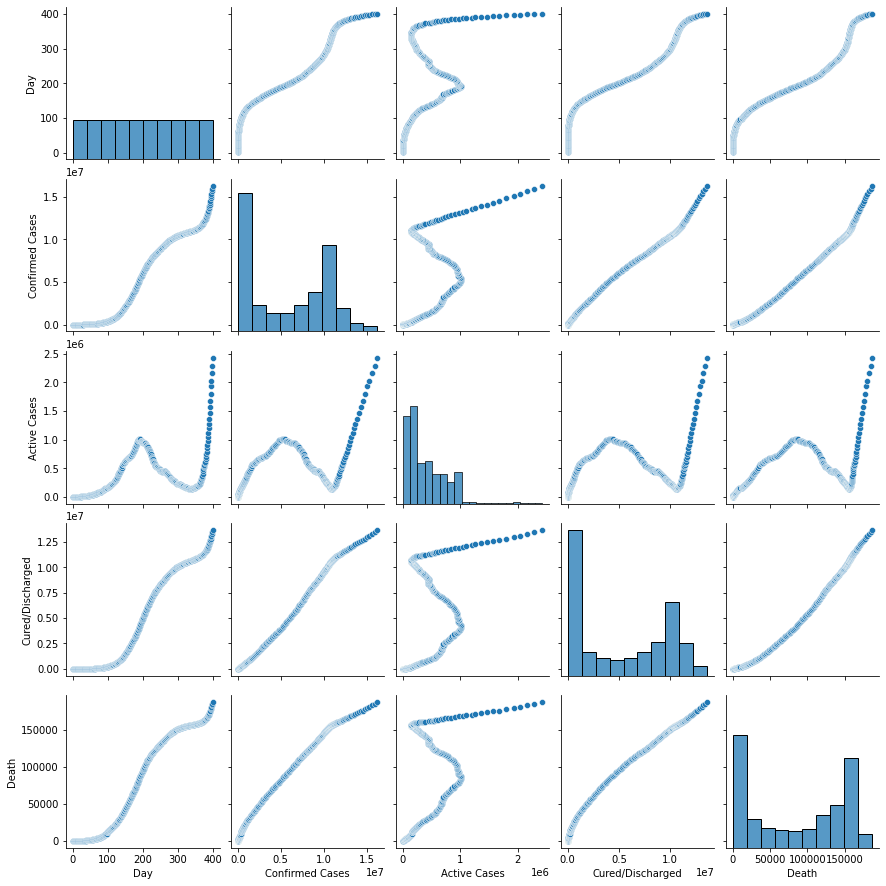

In [114]:
sns.pairplot(data=cases)

<Figure size 864x432 with 0 Axes>

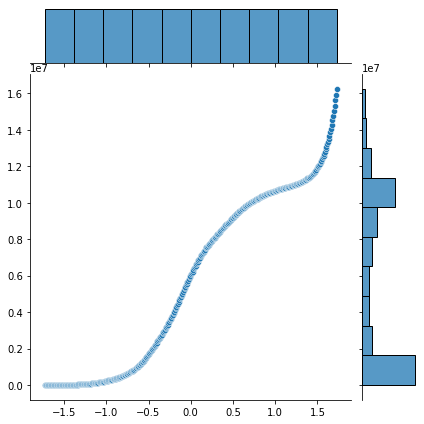

In [127]:
fig=plt.figure(figsize=(12,6))
sns.jointplot(x=X,y=y,data=cases)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model=LinearRegression_model()
model.train(X_train,y_train)

In [129]:
print("slope =",model.get_slope(),"intercept =",model.get_y_intercept())

slope = 4664401.989554752 intercept = 5709070.3460219875


In [130]:
y_predicted=model.predict(X_test)
print("R2 score of model:",model.r2_score(y_predicted,y_test))

R2 score of model: 0.945528026869542


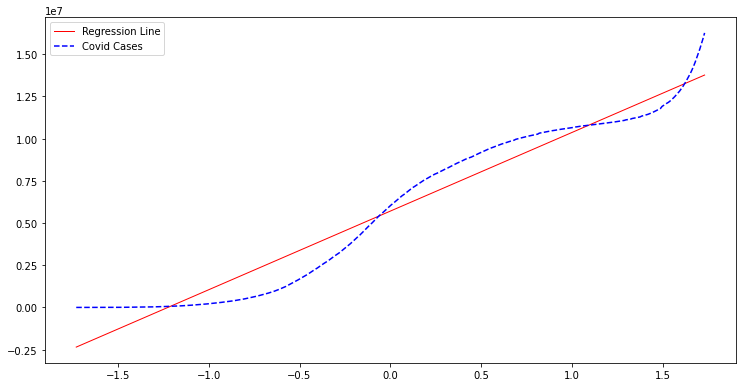

In [131]:
#dotted lines represent the actual cases
#red line represents our regression model
fig=plt.figure(figsize=(12,6))
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(X,model.predict(X),color="red",lw='1',label="Regression Line")
axes.plot(X,y,color="blue",ls="--",label="Covid Cases")
plt.legend()

In [142]:
from datetime import date
Date=input("Please enter the date in dd-mm-yyyy format: ")
(day,month,year)=map(int,Date.split("-"))
Day_count_from_march=(date(year,month,day)-date(2020,3,12)).days-2
Day_count_from_march=scaler.transform(np.array(Day_count_from_march).reshape(-1,1))
print("predicted number of cases: ",int(model.predict([Day_count_from_march])[0][0]))


Please enter the date in dd-mm-yyyy format: 1-6-2020
predicted number of cases:  801073


In [138]:
5567687-5992532


-424845